In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re
true = pd.read_csv(r"data/True.csv")
fake = pd.read_csv(r"data/Fake.csv")

Using TensorFlow backend.
C:\Users\HO_YONG_KIAN\Anaconda3\envs\fake_news_app\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HO_YONG_KIAN\Anaconda3\envs\fake_news_app\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HO_YONG_KIAN\Anaconda3\envs\fake_news_app\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

In [2]:
fake['target'] = 'fake'
true['target'] = 'true'
news = pd.concat([fake, true]).reset_index(drop = True)
news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [3]:
news["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [4]:
news["date"].value_counts()

December 20, 2017                                                                           182
December 6, 2017                                                                            166
November 30, 2017                                                                           162
November 9, 2017                                                                            158
October 13, 2017                                                                            155
                                                                                           ... 
November 12, 2017                                                                             1
https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/      1
June 24, 2017                                                                                 1
May 22, 2016                                                                                  1
January 24, 2016                        

In [5]:
news["target"].value_counts()

fake    23481
true    21417
Name: target, dtype: int64

In [6]:
news_data = news.drop(["date","subject"],axis=1)

In [7]:
news_data.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


### Before cleaning the text

#### Logistic Regression

In [8]:
from sklearn.metrics import plot_confusion_matrix

def plot_con_matrix(classifier,X_test,y_test):
    class_names = news_data["target"].value_counts()
    np.set_printoptions(precision=2)
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)

plt.show()

In [9]:
x_train,x_test,y_train,y_test = train_test_split(news_data['text'], news_data["target"], test_size=0.2, random_state=2020)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(news_data['text'], news_data["target"], test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.76%


Confusion matrix, without normalization
[[4674   66]
 [  45 4195]]
Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


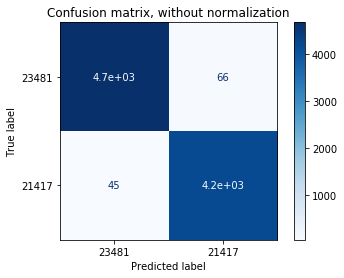

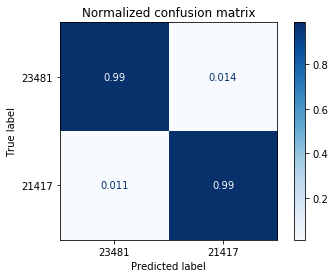

In [11]:
plot_con_matrix(classifier=model,X_test=x_test,y_test=y_test)

In [17]:
model.predict(["Reak"])

array(['fake'], dtype=object)

In [25]:
x_test

2581     Alleged president Donald Trump met with Japane...
24121    WASHINGTON (Reuters) - The Republican National...
6950     An official investigation into a Tennessee Rep...
35383    YANGON (Reuters) - Myanmar authorities have fo...
10989    President Trump s Chief Strategist Steve Banno...
                               ...                        
17828    The numbers are in, and  Megyn Kelly Today  is...
8249     While Ted Cruz would say that he is possessed ...
16657    Here we go again 25 years after the Gulf War w...
16144    Conspiracy theories have been surrounding the ...
11263    Tucker to sanctuary city supporter: how did a ...
Name: text, Length: 8980, dtype: object

In [30]:
x_test.tolist()[1]

'WASHINGTON (Reuters) - The Republican National Committee is withdrawing support for Alabama Republican Senate candidate Roy Moore after allegations surfaced that he had sexual contact with teenage girls decades ago, Politico reported on Tuesday, citing a senior party official. The move further isolates Moore, who has denied the accusations. Republican leaders have distanced themselves from the candidate and the National Republican Senatorial Committee cut ties with him last week. '

In [34]:
print(model.predict([x_test.tolist()[1]]))

['true']


In [35]:
y_test.tolist()[1]

'true'

In [38]:
news = []
news.append(x_test.tolist()[1])
news

['WASHINGTON (Reuters) - The Republican National Committee is withdrawing support for Alabama Republican Senate candidate Roy Moore after allegations surfaced that he had sexual contact with teenage girls decades ago, Politico reported on Tuesday, citing a senior party official. The move further isolates Moore, who has denied the accusations. Republican leaders have distanced themselves from the candidate and the National Republican Senatorial Committee cut ties with him last week. ']

In [41]:
model.predict([x_test.tolist()[1]])[0]

'true'

### Multinomial Naive Bayes Classifier

In [11]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.56%


In [13]:
import pickle
filename = 'MNVBC_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Bernoulli Naive Bayes Classifier

In [14]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.14%


In [15]:
filename = 'BNBC_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Gradient Boost Classifier

In [17]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.14%


In [18]:
filename = 'GBC_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### SGD

In [19]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.1%


In [20]:
filename = 'SGD_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Decision Tree

In [21]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [22]:
filename = 'DT_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### RFC Classifier

In [23]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.9%


In [24]:
filename = 'RFC_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### SVM

In [47]:
x_train,x_test,y_train,y_test = train_test_split(news_data['text'], news_data["target"], test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [48]:
import joblib
filename = 'SVM_model.sav'
joblib.dump(model, filename)

['SVM_model.sav']

### LSTM

In [50]:
X = news_data.text
Y = news_data.target
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
max_words = 500
max_len = 75
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model
model = RNN()


In [52]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [53]:
model.fit(sequences_matrix,Y_train,batch_size=256,epochs=1,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 30530 samples, validate on 7633 samples
Epoch 1/1
30530/30530 [==============================] - 15s 495us/step - loss: 0.2108 - acc: 0.9228 - val_loss: 0.1093 - val_acc: 0.9625


### XBG

In [56]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

[12:43:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 99.52%


In [62]:
import joblib
filename = 'LR_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Save model

In [36]:
import pickle
filename = 'LR_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [42]:
model = pickle.load(open(filename, 'rb'))

In [25]:
!pip install plotly

  Using cached https://files.pythonhosted.org/packages/44/ef/beae4b4ef80902f22e3af073397f079c96969c69b2c7d52a57ea9ae61c9d/retrying-1.3.3.tar.gz
  Created wheel for retrying: filename=retrying-1.3.3-cp36-none-any.whl size=11435 sha256=19b90b29ca0e800368cab6a801958b14bef8b010056ba78a80f378cf7bb4dfef
  Stored in directory: C:\Users\HO_YONG_KIAN\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
